In [1]:
#load libraries 
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from collections import Counter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

In [2]:
#load the database to a dataframe
df = pd.read_csv('../data/lanternworlddata.tsv', sep='\t')

In [3]:
city_mapping = {
    'Golhembourg': 'Gothembourg',
    'Timgrad': 'Timgad',
    'Ijzerstreek': 'IJzerstreek',
    'Blankenberghe': 'Blankenberge',
    'Oostenrijk': 'Wenen',
    'S Gravenhage': 'Den Haag',
    "'S Gravenhage": "Den Haag",
    'de kust': 'Oostende',
    'Berner Hoogland': 'Berner Oberland', 
    'le Mont Saint-Michel': 'Le Mont-Saint-Michel',
    'Zwarte Woud': 'Het Zwarte Woud',
    'Italië': 'Rome',
    'Constantinobel': 'Constantinopel'
    
}

In [4]:
# Split, Stack, and Clean:
df_stacked = df.set_index('period')['city'].str.split(',', expand=True).stack().reset_index(name='city').drop('level_1', axis=1)
df_stacked['city'] = df_stacked['city'].str.strip()

# Country Name Mapping (assuming the given country_mapping dictionary is already defined)
#df_stacked['city'] = df_stacked['country'].replace(country_mapping)

# Overall Counter:
countries_series_cities = df_stacked['city']
overall_counter_cities = Counter(countries_series_cities)

# Counter by Period:
counter_by_period_city = {}
unique_periods = df['period'].unique()

for period in unique_periods:
    subset = df_stacked[df_stacked['period'] == period]['city']
    counter_by_period_city[period] = Counter(subset)

In [5]:
#add geolocations to cities with Chatgpt (all checked by authors)
city_geolocations = {
    'Hastière': {'latitude': 50.1973, 'longitude': 4.8437},
    'Santa Margherita': {'latitude': 44.3345, 'longitude': 9.2132},
    'Genua': {'latitude': 44.4056, 'longitude': 8.9463},  # Also known as Genoa in English
    'Echternach': {'latitude': 49.8056, 'longitude': 6.4222},
    'Marly': {'latitude': 46.4322, 'longitude': 7.1641},
    'Lapland': {'latitude': 67.9222, 'longitude': 26.5046},  # Approximate center of Lapland region
    'Venetië': {'latitude': 45.4408, 'longitude': 12.3155},  # Also known as Venice in English
    'Stockholm': {'latitude': 59.3293, 'longitude': 18.0686},
    'Savoie': {'latitude': 45.5663, 'longitude': 5.9208},
    'Vianden': {'latitude': 49.9352, 'longitude': 6.2089},
    'Verdun': {'latitude': 49.1663, 'longitude': 5.3838},
    'Lourdes': {'latitude': 43.0925, 'longitude': -0.0458},
    'Brussel': {'latitude': 50.8503, 'longitude': 4.3517},  # Also known as Brussels in English
    'Nohant-Vic': {'latitude': 46.6222, 'longitude': 1.9833},
    'Lermatt': {'latitude': 46.0207, 'longitude': 7.7491},  # Approximation as "Lermatt" may not be a standard name, possibly referring to Zermatt
    'Athene': {'latitude': 37.9838, 'longitude': 23.7275},  # Also known as Athens in English
    'Gent': {'latitude': 51.0543, 'longitude': 3.7174},  # Also known as Ghent in English
    'Péruwelz': {'latitude': 50.5083, 'longitude': 3.5939},
    'Beieren': {'latitude': 48.7904, 'longitude': 11.4979},  # Also known as Bavaria in English
    'Meudon': {'latitude': 48.8131, 'longitude': 2.2350},
    'Nieuwpoort': {'latitude': 51.1153, 'longitude': 2.7658},
    'Vogezen': {'latitude': 48.2602, 'longitude': 7.2205},  # Also known as Vosges in English/French
    'Nîmes': {'latitude': 43.8367, 'longitude': 4.3609},
    'Cantal': {'latitude': 45.0549, 'longitude': 2.9972},
    'Zeeland': {'latitude': 51.4940, 'longitude': 3.8497},
    'Nizza': {'latitude': 43.7102, 'longitude': 7.2620},  # Also known as Nice in English/French
    'Versailles': {'latitude': 48.8049, 'longitude': 2.1204},
    'Kartha': {'latitude': None, 'longitude': None},  # I couldn't find a location by this name, please provide more context or check the spelling.
    'Het Zwarte Woud': {'latitude': 48.0707, 'longitude': 8.0198},  # Known as the Black Forest in English
    'Ravenue': {'latitude': None, 'longitude': None},  # I couldn't find a location by this name. It might be a misspelling or a less-known place.
    'Amsterdam': {'latitude': 52.3676, 'longitude': 4.9041},
    'Dolomieten': {'latitude': 46.5553, 'longitude': 11.8882},  # Known as Dolomites in English
    'Doornik': {'latitude': 50.6079, 'longitude': 3.3899},  # Known as Tournai in French
    'De Schie': {'latitude': 51.9225, 'longitude': 4.4792},  # It's a river in the Netherlands, so this is an approximate central point.
    'Den Haag': {'latitude': 52.0705, 'longitude': 4.3007},  # Known as The Hague in English
    'New York': {'latitude': 40.7128, 'longitude': -74.0060},
    'Tarn': {'latitude': 43.9352, 'longitude': 2.1460},
    'Tokio': {'latitude': 35.6895, 'longitude': 139.6917},  # Known as Tokyo in English
    'Pompei': {'latitude': 40.7488, 'longitude': 14.4895},
    'Etterbeek': {'latitude': 50.8369, 'longitude': 4.3895},
    'Kei-eilanden': {'latitude': -5.5401, 'longitude': 132.9752},  # Known as the Kai Islands in English
    'Île-de-France': {'latitude': 48.8499, 'longitude': 2.6370},
    'Vaux-le-Victomte': {'latitude': 48.5659, 'longitude': 2.7149},
    'Galicië': {'latitude': 42.5751, 'longitude': -8.1339},  # This refers to Galicia in Spain. Note there's also a Galicia in Poland.
    'Henegouwen': {'latitude': 50.5257, 'longitude': 3.8827},  # Known as Hainaut in French
    'Leiden': {'latitude': 52.1601, 'longitude': 4.4970},
    'Christiania': {'latitude': 55.6737, 'longitude': 12.5966},  # Known as Freetown Christiania, an autonomous community in Copenhagen
    'Praag': {'latitude': 50.0755, 'longitude': 14.4378},  # Known as Prague in English
    'Catalonië': {'latitude': 41.5912, 'longitude': 1.5209},  # Known as Catalonia in English
    'Haarlem': {'latitude': 52.3874, 'longitude': 4.6462},
    'Valkenburg': {'latitude': 50.8687, 'longitude': 5.8316},  # This is for Valkenburg aan de Geul in the Netherlands
    'Saint-Cloud': {'latitude': 48.8454, 'longitude': 2.1917},
    'IJzerstreek': {'latitude': 51.0335, 'longitude': 2.8612},  # Referring to the Yser region in Belgium
    'Belgrado': {'latitude': 44.7866, 'longitude': 20.4489},  # Known as Belgrade in English
    'Milaan': {'latitude': 45.4642, 'longitude': 9.1900},  # Known as Milan in English
    'Luxemburg': {'latitude': 49.8153, 'longitude': 6.1296},  # This is for Luxembourg City, in the country of Luxembourg
    'Kopenhagen': {'latitude': 55.6761, 'longitude': 12.5683},  # Known as Copenhagen in English
    'Luik': {'latitude': 50.6326, 'longitude': 5.5797},  # Known as Liège in French
    'Fontainebleau': {'latitude': 48.4047, 'longitude': 2.7016},
    'Ardennen': {'latitude': 50.1765, 'longitude': 5.1982},  # Known as the Ardennes, a region spanning Belgium, Luxembourg, and France
    'Vlaanderen': {'latitude': 51.0538, 'longitude': 3.7250},  # Known as Flanders in English
    'Le Mont-Saint-Michel': {'latitude': 48.6360, 'longitude': -1.5115},
    'Waterloo': {'latitude': 50.7147, 'longitude': 4.3991},  # Referring to the town in Belgium
    'Land van Waas': {'latitude': 51.2108, 'longitude': 4.1097},  # A region in East Flanders, Belgium
    'La Montagne': {'latitude': -20.9481, 'longitude': 55.6537},  # There are multiple places with this name, the provided coordinates are for La Montagne in Réunion, a French department.
    'Touraine': {'latitude': 47.3435, 'longitude': 0.7148},  # A historical province in France
    'Berlijn': {'latitude': 52.5200, 'longitude': 13.4050},  # Known as Berlin in English
    'Mechelen': {'latitude': 51.0259, 'longitude': 4.4775},
    'Namen': {'latitude': 50.4674, 'longitude': 4.8717},  # Known as Namur in French
    'Zermatt': {'latitude': 46.0207, 'longitude': 7.7491},
    'Ruhrgebied': {'latitude': 51.4834, 'longitude': 7.2169},  # Known as the Ruhr area in English, a region in Germany
    'Londen': {'latitude': 51.5074, 'longitude': -0.1278},  # Known as London in English
    'Moerdijk': {'latitude': 51.7002, 'longitude': 4.6208},
    'Rotterdam': {'latitude': 51.9225, 'longitude': 4.4792},
    'Timgad': {'latitude': 35.4822, 'longitude': 6.4654},  # An ancient Roman city in Algeria
    'Constantinopel': {'latitude': 41.0082, 'longitude': 28.9784},  # The historical name for Istanbul, Turkey
    'Puy-de-Dôme': {'latitude': 45.7725, 'longitude': 2.9646},  # A volcano in the Massif Central of France
    'Zeeuws-Vlaanderen': {'latitude': 51.3217, 'longitude': 3.4583},  # The southern part of the Dutch province of Zeeland
    'Vaticaan': {'latitude': 41.9029, 'longitude': 12.4534},  # Known as Vatican City in English
    'Gütenberg': {'latitude': None, 'longitude': None},  # I couldn't find a location by this name. It might be a misspelling or a less-known place.
    'Parijs': {'latitude': 48.8566, 'longitude': 2.3522},  # Known as Paris in English
    'Poppel': {'latitude': 51.4677, 'longitude': 5.0690},  # A village in Belgium
    'Spa': {'latitude': 50.4922, 'longitude': 5.8617},
    'Tibet': {'latitude': 31.6927, 'longitude': 88.0924},
    'Malakka': {'latitude': 2.1896, 'longitude': 102.2501},  # Known as Malacca in English, a state in Malaysia
    'Wallonië': {'latitude': 50.5039, 'longitude': 4.4699}, 
    'Lombardije': {'latitude': 45.4668, 'longitude': 9.1905},  # Known as Lombardy in English, a region in Italy
    'Maduré': {'latitude': None, 'longitude': None},  # I couldn't identify a location by this name. Might be a misspelling or a lesser-known place.
    'Punjab': {'latitude': 31.1471, 'longitude': 75.3412},  # A state in India, though there's also Punjab in Pakistan
    'Toscane': {'latitude': 43.7696, 'longitude': 11.2558},  # Known as Tuscany in English
    'Thebe': {'latitude': 25.6872, 'longitude': 32.6396},  # Known as Thebes in English, an ancient city in Egypt
    'Leuven': {'latitude': 50.8798, 'longitude': 4.7005},
    'Ardèche': {'latitude': 44.5588, 'longitude': 4.7503},  # A department in France
    'Berner Oberland': {'latitude': 46.6863, 'longitude': 7.8632},  # A region in the Bernese Highlands, Switzerland
    'Wenen': {'latitude': 48.2082, 'longitude': 16.3738},  # Known as Vienna in English
    'Boezinge': {'latitude': 50.8950, 'longitude': 2.8727},
    'Chartres': {'latitude': 48.4488, 'longitude': 1.4893},
    'Bali': {'latitude': -8.3405, 'longitude': 115.0920},  # An Indonesian island
    'Dijon': {'latitude': 47.3220, 'longitude': 5.0415},
    'Rome': {'latitude': 41.9028, 'longitude': 12.4964},
    'Zwarte Wout': {'latitude': None, 'longitude': None},  # I couldn't identify a location by this name. It might be a misspelling.
    'Scheveningen': {'latitude': 52.1144, 'longitude': 4.2791},  # A district in The Hague, Netherlands
    'California': {'latitude': 36.7783, 'longitude': -119.4179},  # A state in the USA
    'Dordrecht': {'latitude': 51.8133, 'longitude': 4.6901},
    'Scilly-eilanden': {'latitude': 49.9360, 'longitude': -6.3298},  # Known as the Isles of Scilly in English
    'Limburg': {'latitude': 51.2025, 'longitude': 5.9989},  # A province in the Netherlands, but also a province in Belgium
    'Brugge': {'latitude': 51.2093, 'longitude': 3.2247},  # Known as Bruges in English
    'Argos': {'latitude': 37.6345, 'longitude': 22.7257},  # A city in Greece
    'Delft': {'latitude': 52.0116, 'longitude': 4.3571},
    'West-Vlaanderen': {'latitude': 50.8503, 'longitude': 3.3515},  # A province in Belgium
    'Rio de Janeiro': {'latitude': -22.9068, 'longitude': -43.1729},
    'Marken': {'latitude': 52.4584, 'longitude': 5.1040},  # An island in the Netherlands
    'Kempen': {'latitude': 51.3000, 'longitude': 5.0000},  # Referring to the Kempen region in Belgium and the Netherlands
    'Elzas': {'latitude': 48.3182, 'longitude': 7.4416},  # Known as Alsace in English
    'Genève': {'latitude': 46.2044, 'longitude': 6.1432},  # Known as Geneva in English
    'Great St Bernard Pass': {'latitude': 45.8398, 'longitude': 7.1664},  # A mountain pass in the Swiss Alps
    'Boma': {'latitude': -5.8400, 'longitude': 13.0500},  # A port town in the Democratic Republic of Congo
    'Oxford': {'latitude': 51.7520, 'longitude': -1.2577},
    'Voisins': {'latitude': None, 'longitude': None},  # I couldn't identify a location by this name. It might be a less-known place or a misspelling.
    'Causse': {'latitude': 44.2407, 'longitude': 3.1232},  # Referring to the Causse region in France
    'Elzas-Lotheringen': {'latitude': None, 'longitude': None},  # This appears to be a combination of Alsace and Lorraine, two regions in France. Exact coordinates would depend on the specific area.
    'Valais': {'latitude': 46.2187, 'longitude': 7.3186},  # A canton in Switzerland
    'Corfu': {'latitude': 39.6243, 'longitude': 19.9222},  # Also known as Kerkyra in Greek, an island in Greece
    'Coo': {'latitude': 50.4103, 'longitude': 5.9119},  # Referring to Coo-Trois-Ponts, a village in Belgium
    'Zoniënwoud': {'latitude': 50.7992, 'longitude': 4.4185},  # Also known as Sonian Forest in English, a forest in Belgium
    'Constantinobel': {'latitude': None, 'longitude': None},  # This appears to be a historical name for Constantinople (Istanbul), Turkey. Exact coordinates would depend on the time period.
    'Caïro': {'latitude': 30.0444, 'longitude': 31.2357},  # Known as Cairo in English
    'Gévaudan': {'latitude': 44.6859, 'longitude': 3.3467},  # A former province in France
    'La Houillère': {'latitude': None, 'longitude': None},  # I couldn't identify a location by this name. It might be a less-known place.
    'Dover': {'latitude': 51.1264, 'longitude': 1.3169},
    'Blankenberge': {'latitude': 51.3133, 'longitude': 3.1323},  # A coastal town in Belgium
    'Gascogne': {'latitude': 43.9681, 'longitude': -0.1457},  # Known as Gascony in English, a historical region in France
    'Ieper': {'latitude': 50.8514, 'longitude': 2.8837},  # Known as Ypres in English
    'Elisabethville': {'latitude': -11.6626, 'longitude': 27.4794},  # It might be referring to Lubumbashi, a city in the Democratic Republic of Congo, formerly known as Elisabethville.
    'Gothembourg': {'latitude': 57.7089, 'longitude': 11.9746},  # I couldn't identify a location by this name. It might be a misspelling or a less-known place.
    'Transvaal': {'latitude': -25.7461, 'longitude': 28.1871},  # A historical region in South Africa
    'Sofia': {'latitude': 42.6977, 'longitude': 23.3219},  # The capital of Bulgaria
    'Oberengadin': {'latitude': 46.5000, 'longitude': 9.8333},  # A region in the Engadin Valley, Switzerland
    "Folklore de l'Auvergne": {'latitude': 45.6544, 'longitude': 3.2544},  # This appears to be a cultural reference to the Auvergne region in France. Exact coordinates would depend on the specific area.
    'Adrar': {'latitude': 27.8667, 'longitude': -0.2833},  # A region in Algeria
    'Bretagne': {'latitude': 48.2020, 'longitude': -2.9326},  # Known as Brittany in English
    'Katanga': {'latitude': -11.7600, 'longitude': 27.2522},  # A province in the Democratic Republic of Congo, also known as Shaba
    'Jerusalem': {'latitude': 31.7683, 'longitude': 35.2137},
    'Tyrol': {'latitude': 47.2537, 'longitude': 11.6016},  # Also known as Tirol in German
    'Antwerpen': {'latitude': 51.2194, 'longitude': 4.4025},  # Known as Antwerp in English
    'Boedapest': {'latitude': 47.4979, 'longitude': 19.0402},  # Known as Budapest in English
    'Elzas-Lotharingen': {'latitude': 48.3182, 'longitude': 7.4416},  # This appears to be a combination of Alsace and Lorraine, two regions in France. Exact coordinates would depend on the specific area.
    'Bern': {'latitude': 46.9480, 'longitude': 7.4474},  # Also known as Berne in German
    'Angkor': {'latitude': 13.4125, 'longitude': 103.8667},  # Referring to the Angkor Archaeological Park in Cambodia
    'Oudenaarde': {'latitude': 50.8471, 'longitude': 3.6072},
    'Brabant': {'latitude': 50.9000, 'longitude': 4.5000},  # This could refer to various regions named Brabant in Europe, including Flemish Brabant and Walloon Brabant in Belgium.
    'Tremezzo': {'latitude': 45.9792, 'longitude': 9.2247},  # A town on Lake Como in Italy
    'Trazegnies': {'latitude': 50.4800, 'longitude': 4.2667},  # A village in Belgium
    'Reims': {'latitude': 49.2583, 'longitude': 4.0319},
    'Sceaux': {'latitude': 48.7741, 'longitude': 2.2986},  # Known as Sceaux in English, a commune in France
    'Causse Noir': {'latitude': 44.3833, 'longitude': 3.2333},  # A region in France
    'Pekin': {'latitude': 39.9042, 'longitude': 116.4074},  # Known as Beijing in English
    'Turijn': {'latitude': 45.0703, 'longitude': 7.6869},  # Known as Turin in English
    'Californië': {'latitude': 36.7783, 'longitude': -119.4179},  # Known as California in English
    'Tanger': {'latitude': 35.7721, 'longitude': -5.8110},  # Known as Tangier in English
    'Madrid': {'latitude': 40.4168, 'longitude': -3.7038},
    'Compiègne': {'latitude': 49.4185, 'longitude': 2.8260},
    'Zaandam': {'latitude': 52.4388, 'longitude': 4.8265},  # A city in the Netherlands
    'Québec': {'latitude': 46.8139, 'longitude': -71.2080},
    'Périgord': {'latitude': 45.2085, 'longitude': 0.7212},  # Known as Périgord in French, a region in France
    'Mekka': {'latitude': 21.3891, 'longitude': 39.8579},  # Known as Mecca in English
    'Dauphiné': {'latitude': 45.2670, 'longitude': 5.6824},  # A historical province in southeastern France
    'Villers-la-Ville': {'latitude': 50.5794, 'longitude': 4.5285},  # A commune in Belgium
    'Auvergne': {'latitude': 45.6544, 'longitude': 3.2544},  # A region in central France
    'Stanleyville': {'latitude': 0.5158, 'longitude': 25.1908},  # Known as Kisangani in the Democratic Republic of Congo
    'Tanganyika': {'latitude': -6.9281, 'longitude': 29.6822},  # A lake in East Africa, also a former territory in the Democratic Republic of Congo
    'Napels': {'latitude': 40.8522, 'longitude': 14.2681},  # Known as Naples in English
    'Florence': {'latitude': 43.7696, 'longitude': 11.2558},
    'Laken': {'latitude': 50.8831, 'longitude': 4.3581},  # Known as Laken in Dutch, a neighborhood in Brussels, Belgium
    'Andalusië': {'latitude': 37.5443, 'longitude': -4.7278},  # Known as Andalusia in English, an autonomous community in Spain
    'Normandië': {'latitude': 49.4178, 'longitude': 0.8322},  # Known as Normandy in English
    'Laarne': {'latitude': 51.0714, 'longitude': 3.8900},  # A municipality in Belgium
    'la Savoire': {'latitude': None, 'longitude': None},  # I couldn't identify a location by this name. It might be a less-known place or a misspelling.
    'Oostende': {'latitude': 51.2154, 'longitude': 2.9287},  # Known as Ostend in English, a coastal city in Belgium
    'Beaufort': {'latitude': 49.1292, 'longitude': -0.4119},  # Several places named Beaufort exist in France.
    'Le Puy-en-Velay': {'latitude': 45.0436, 'longitude': 3.8850},
    'Siena': {'latitude': 43.3188, 'longitude': 11.3308},  # Known as Siena in English
    'Nancy': {'latitude': 48.6921, 'longitude': 6.1844},
    'Saintonge': {'latitude': 45.7076, 'longitude': -0.8277},  # A historical region in France
}

In [6]:
# Split, Stack, and Clean
df_stacked = df.set_index(['E_aantal keer vermeld'])['city'].str.split(',', expand=True).stack().reset_index(name='city').drop('level_1', axis=1)
df_stacked['city'] = df_stacked['city'].str.strip()

# Country Name Mapping (assuming the given city_mapping dictionary is already defined)
df_stacked['city'] = df_stacked['city'].replace(city_mapping)

# Initialize an empty counter for the total count
total_counter = Counter()

# Loop through each row in the stacked DataFrame and update the total counter
for _, row in df_stacked.iterrows():
    total_counter[row['city']] += row['E_aantal keer vermeld']

In [7]:
# Convert the dictionary to a list of dictionaries with 'country', 'lat', and 'lon' keys
data_list = []
for city, coords in city_geolocations.items():
    data_list.append({
        'city': city,
        'lat': coords['latitude'],
        'lon': coords['longitude']
    })

# Create a DataFrame
df_city_coords = pd.DataFrame(data_list)

/Users/thomassmits/miniforge3/envs/lantern/lib/python3.9/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/Users/thomassmits/miniforge3/envs/lantern/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/thomassmits/miniforge3/envs/lantern/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


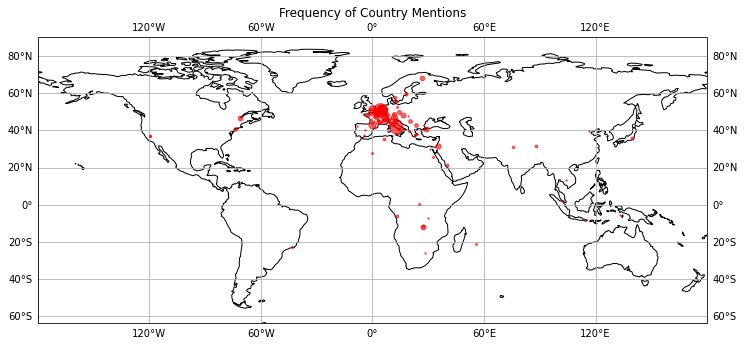

In [33]:
#Create a world map of cities mentioned (not used in article)

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

# Loop through the DataFrame and plot each country
for index, row in df_city_coords.iterrows():
    country = row['city']
    lat = row['lat']
    lon = row['lon']
    count = total_counter.get(country, 0)
    
    # Multiply the count by a constant to make it visible on the map
    size = count * 2
    
    ax.scatter(lon, lat, s=size, label=f"{country} ({count})", zorder=10, c='red', alpha=0.6)

# Add a grid and set extent
ax.gridlines(draw_labels=True)
ax.set_extent([-150, 150, -60, 90])

plt.title('Frequency of Country Mentions')
plt.show()

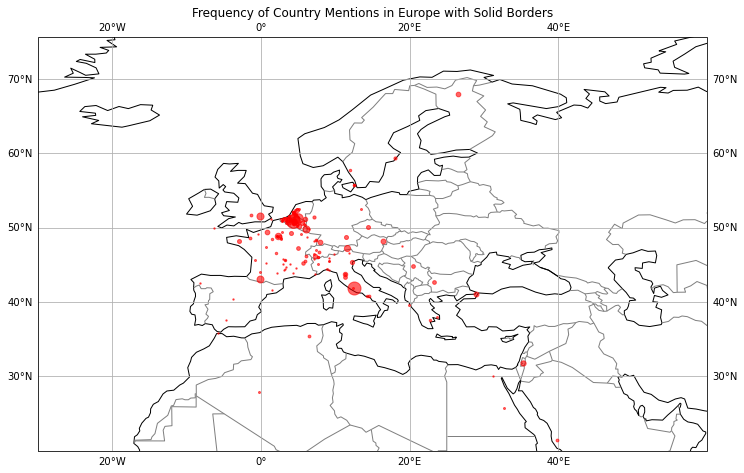

In [34]:
# Define the extent to focus on Europe
extent = [-30, 60, 20, 70]  # [lon_min, lon_max, lat_min, lat_max]

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='gray')  # Use linestyle='-' for solid lines

# Loop through the DataFrame and plot each country within the European extent
for index, row in df_city_coords.iterrows():
    country = row['city']
    lat = row['lat']
    lon = row['lon']
    count = total_counter.get(country, 0)
    
    # Check if the coordinates are within the European extent
    if extent[0] <= lon <= extent[1] and extent[2] <= lat <= extent[3]:
        # Multiply the count by a constant to make it visible on the map
        size = count * 2
        ax.scatter(lon, lat, s=size, label=f"{country} ({count})", zorder=10, c='red', alpha=0.6)

# Add a grid and set the extent to focus on Europe
ax.gridlines(draw_labels=True)
ax.set_extent(extent)

plt.title('Frequency of Country Mentions in Europe with Solid Borders')
plt.show()

/Users/thomassmits/miniforge3/envs/lantern/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


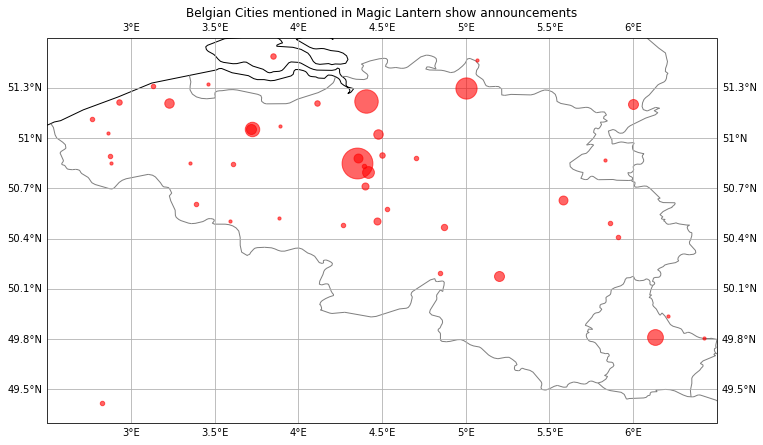

In [8]:
# Define the extent to focus on Belgium
extent = [2.5, 6.5, 49.3, 51.6]  # [lon_min, lon_max, lat_min, lat_max]

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='gray')  # Use linestyle='-' for solid lines

# Loop through the DataFrame and plot each country within the extent
for index, row in df_city_coords.iterrows():
    country = row['city']
    lat = row['lat']
    lon = row['lon']
    count = total_counter.get(country, 0)
    
    # Check if the coordinates are within the specified extent
    if extent[0] <= lon <= extent[1] and extent[2] <= lat <= extent[3]:
        # Multiply the count by a constant to make it visible on the map
        size = count * 10
        ax.scatter(lon, lat, s=size, label=f"{country} ({count})", zorder=10, c='red', alpha=0.6)

# Add a grid and set the extent to focus on Belgium
ax.gridlines(draw_labels=True)
ax.set_extent(extent)

plt.title('Belgian Cities mentioned in Magic Lantern show announcements')
#The code below saves the Figure X of the article
plt.savefig('cities_belgium.png', dpi=300)
plt.show()


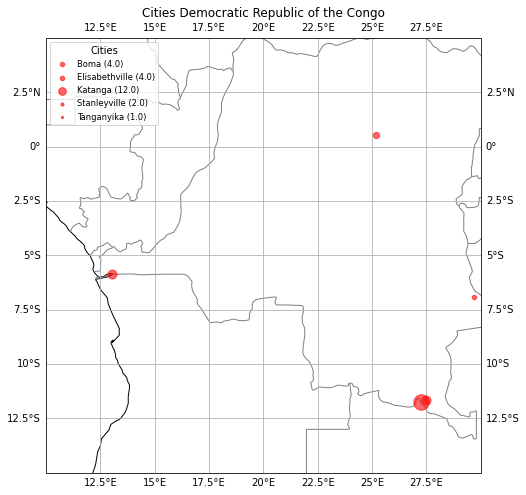

In [9]:
# Define the extent to focus on Congo
extent = [10.0, 30.0, -15.0, 5.0]  # [lon_min, lon_max, lat_min, lat_max]

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='gray')  # Use linestyle='-' for solid lines

#Loop through the DataFrame and plot each country within the extent
for index, row in df_city_coords.iterrows():
    city = row['city']
    lat = row['lat']
    lon = row['lon']
    count = total_counter.get(city, 0)
    
    # Check if the coordinates are within the specified extent
    if extent[0] <= lon <= extent[1] and extent[2] <= lat <= extent[3]:
        # Multiply the count by a constant to make it visible on the map
        size = count * 20
        ax.scatter(lon, lat, s=size, label=f"{city} ({count})", zorder=10, c='red', alpha=0.6)

# Add a grid and set the extent to focus on Congo
ax.gridlines(draw_labels=True)
ax.set_extent(extent)

# Add the legend
# You can adjust the location and other properties as required
ax.legend(loc="upper left", title="Cities", fontsize="small", markerscale=0.5)

plt.title('Cities Democratic Republic of the Congo')
plt.savefig('congocities.png', dpi=300)

plt.show()
